In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

#### Select one feature ('RM' - average number of rooms) and target ('MEDV' - house price)
# Select multiple features
X = df[["RM", "LSTAT", "CRIM"]]  # Feature set
y = df["MEDV"]  # Target (house price)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Create polynomial regression pipeline (degree 2)
degree = 2
model = make_pipeline(PolynomialFeatures(degree=degree), StandardScaler(), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")


Training MSE: 19.04
Testing MSE: 16.95


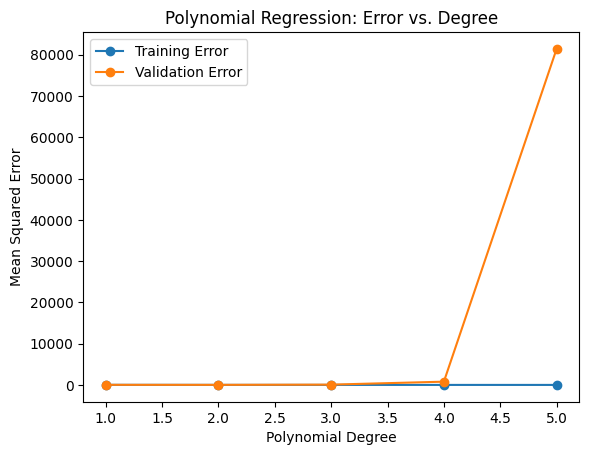

In [5]:
from sklearn.model_selection import cross_val_score

degrees = range(1, 6)  # Try polynomial degrees 1 to 5
train_errors = []
val_errors = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), StandardScaler(), LinearRegression())
    model.fit(X_train, y_train)  # Train model
    
    # Compute training error
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)

    # Compute validation error using cross-validation
    val_mse = -np.mean(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    val_errors.append(val_mse)

# Plot training & validation errors
plt.plot(degrees, train_errors, label="Training Error", marker="o")
plt.plot(degrees, val_errors, label="Validation Error", marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Polynomial Regression: Error vs. Degree")
plt.legend()
plt.show()